## Exploratory Data Analysis

In this notebook, we will perform Exploratory Data Analysis (EDA) on our preprocessed dataset. Although the majority of observations about the data seem obvious through domain knowledge (skewed distributions, OHLC having high correlation, outliers), it will still be beneficial to perform some EDA to identify trends, perform rolling statistics, volatility and returns analysis.

### Importing Dependencies

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

### Summary Statistics

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('10_Year_Historical_Preprocessed.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [21]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3221760.00,3221760.00,3221760.00,3221760.00,3221760.00,3221760.00
mean,1521631.61,1589446.71,1441351.79,1503808.24,1503794.08,1576123.31
std,103501135.23,108129606.20,97785676.56,102074203.78,102074203.94,16548948.19
min,0.01,0.01,0.01,0.01,-0.04,0.00
25%,9.50,9.70,9.26,9.49,8.88,15500.00
50%,22.85,23.26,22.45,22.85,21.49,112800.00
75%,52.19,53.04,51.28,52.17,50.01,527800.00
max,19373174784.00,19373174784.00,18285750272.00,18285750272.00,18285750272.00,3692928000.00


In [22]:
summary = df.groupby(by='Ticker')[['Adj Close', 'Volume']].describe().sample(n=10)
summary

Adj Close                                              Volume  \
           count  mean   std   min   25%   50%    75%    max   count   
Ticker                                                                 
FAST     2517.00 37.29 17.37 14.99 20.30 32.05  52.71  78.42 2517.00   
GNTX     2517.00 24.25  7.06 12.00 17.76 24.72  29.94  37.69 2517.00   
CZWI     2517.00 10.91  2.21  5.33  8.79 11.27  12.84  16.34 2517.00   
TURN     2517.00  5.84  1.43  3.23  4.71  5.81   6.60  11.04 2517.00   
RGLD     2517.00 90.76 27.42 22.79 69.84 94.22 112.37 152.65 2517.00   
ACAD     2517.00 28.45 10.28 13.01 19.76 26.78  35.24  57.00 2517.00   
AMD      2517.00 55.82 51.63  1.62 11.07 33.69  92.77 211.38 2517.00   
DIOD     2517.00 50.55 25.77 16.96 26.90 41.04  74.07 112.42 2517.00   
LMAT     2517.00 36.30 18.97  6.34 23.01 33.27  49.02  92.93 2517.00   
BELFB    2517.00 25.32 15.81  6.27 15.77 19.74  26.40  85.00 2517.00   

                                                                              \
              mean         std       min         25%         50%         75%   
Ticker                                                                         
FAST    4425118.08  2793579.09 704500.00  2843600.00  3756900.00  5169800.00   
GNTX    1736010.65   925330.59 201600.00  1141300.00  1511100.00  2058600.00   
CZWI      11283.75    20771.34      0.00     1900.00     5200.00    11800.00   
TURN      22461.28    32766.29      0.00     7800.00    14200.00    25467.00   
RGLD     568635.68   336258.58 115000.00   363100.00   488300.00   664900.00   
ACAD    1819967.54  1781255.68      0.00  1052600.00  1412000.00  1964500.00   
AMD    57459428.45 36724297.22      0.00 34429600.00 51223600.00 75182500.00   
DIOD     277331.90   173582.96  39000.00   167800.00   239300.00   334800.00   
LMAT     124023.96   115966.49   1300.00    73100.00   102500.00   143800.00   
BELFB     61644.42    95215.22   4800.00    25800.00    41500.00    72100.00   

                     
                max  
Ticker               
FAST    52609600.00  
GNTX     9474800.00  
CZWI      264600.00  
TURN      593700.00  
RGLD     4662300.00  
ACAD    24262400.00  
AMD    325058400.00  
DIOD     1746600.00  
LMAT     2960300.00  
BELFB    2749000.00

In [23]:
def add_cv_and_format(df):
    df['cv'] = df['std'] / df['mean'] * 100
    return df[['count', 'mean', 'std', 'cv', 'min', '25%', '50%', '75%', 'max']]

In [24]:
adj_close_summary = add_cv_and_format(summary['Adj Close'].copy())
volume_summary = add_cv_and_format(summary['Volume'].copy())

In [25]:
adj_close_summary

,count,mean,std,cv,min,25%,50%,75%,max
Ticker,,,,,,,,,
FAST,2517.00,37.29,17.37,46.57,14.99,20.30,32.05,52.71,78.42
GNTX,2517.00,24.25,7.06,29.12,12.00,17.76,24.72,29.94,37.69
CZWI,2517.00,10.91,2.21,20.30,5.33,8.79,11.27,12.84,16.34
TURN,2517.00,5.84,1.43,24.54,3.23,4.71,5.81,6.60,11.04
RGLD,2517.00,90.76,27.42,30.21,22.79,69.84,94.22,112.37,152.65
ACAD,2517.00,28.45,10.28,36.15,13.01,19.76,26.78,35.24,57.00
AMD,2517.00,55.82,51.63,92.48,1.62,11.07,33.69,92.77,211.38
DIOD,2517.00,50.55,25.77,50.97,16.96,26.90,41.04,74.07,112.42
LMAT,2517.00,36.30,18.97,52.26,6.34,23.01,33.27,49.02,92.93


In [26]:
volume_summary

,count,mean,std,cv,min,25%,50%,75%,max
Ticker,,,,,,,,,
FAST,2517.00,4425118.08,2793579.09,63.13,704500.00,2843600.00,3756900.00,5169800.00,52609600.00
GNTX,2517.00,1736010.65,925330.59,53.30,201600.00,1141300.00,1511100.00,2058600.00,9474800.00
CZWI,2517.00,11283.75,20771.34,184.08,0.00,1900.00,5200.00,11800.00,264600.00
TURN,2517.00,22461.28,32766.29,145.88,0.00,7800.00,14200.00,25467.00,593700.00
RGLD,2517.00,568635.68,336258.58,59.13,115000.00,363100.00,488300.00,664900.00,4662300.00
ACAD,2517.00,1819967.54,1781255.68,97.87,0.00,1052600.00,1412000.00,1964500.00,24262400.00
AMD,2517.00,57459428.45,36724297.22,63.91,0.00,34429600.00,51223600.00,75182500.00,325058400.00
DIOD,2517.00,277331.90,173582.96,62.59,39000.00,167800.00,239300.00,334800.00,1746600.00
LMAT,2517.00,124023.96,115966.49,93.50,1300.00,73100.00,102500.00,143800.00,2960300.00


### Correlation Analysis

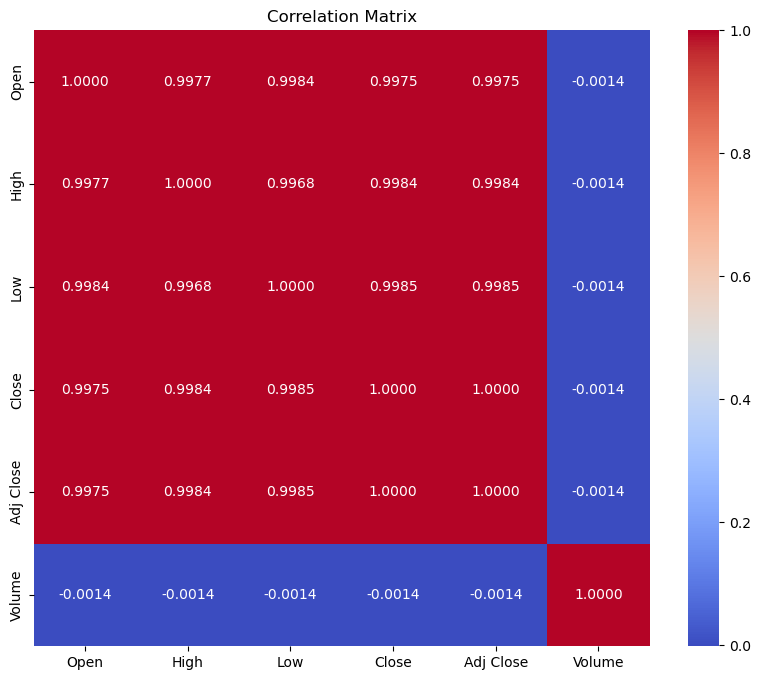

In [28]:
correlation_matrix = df[df.columns[1:]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.4f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### Sampling Tickers

In [29]:
sampled_tickers = list(summary.index)
sampled_df = df[df['Ticker'].isin(sampled_tickers)]

In [30]:
n = len(sampled_tickers)
n_cols = 2
n_rows = (n + n_cols - 1) // n_cols

### Closing Price Analysis

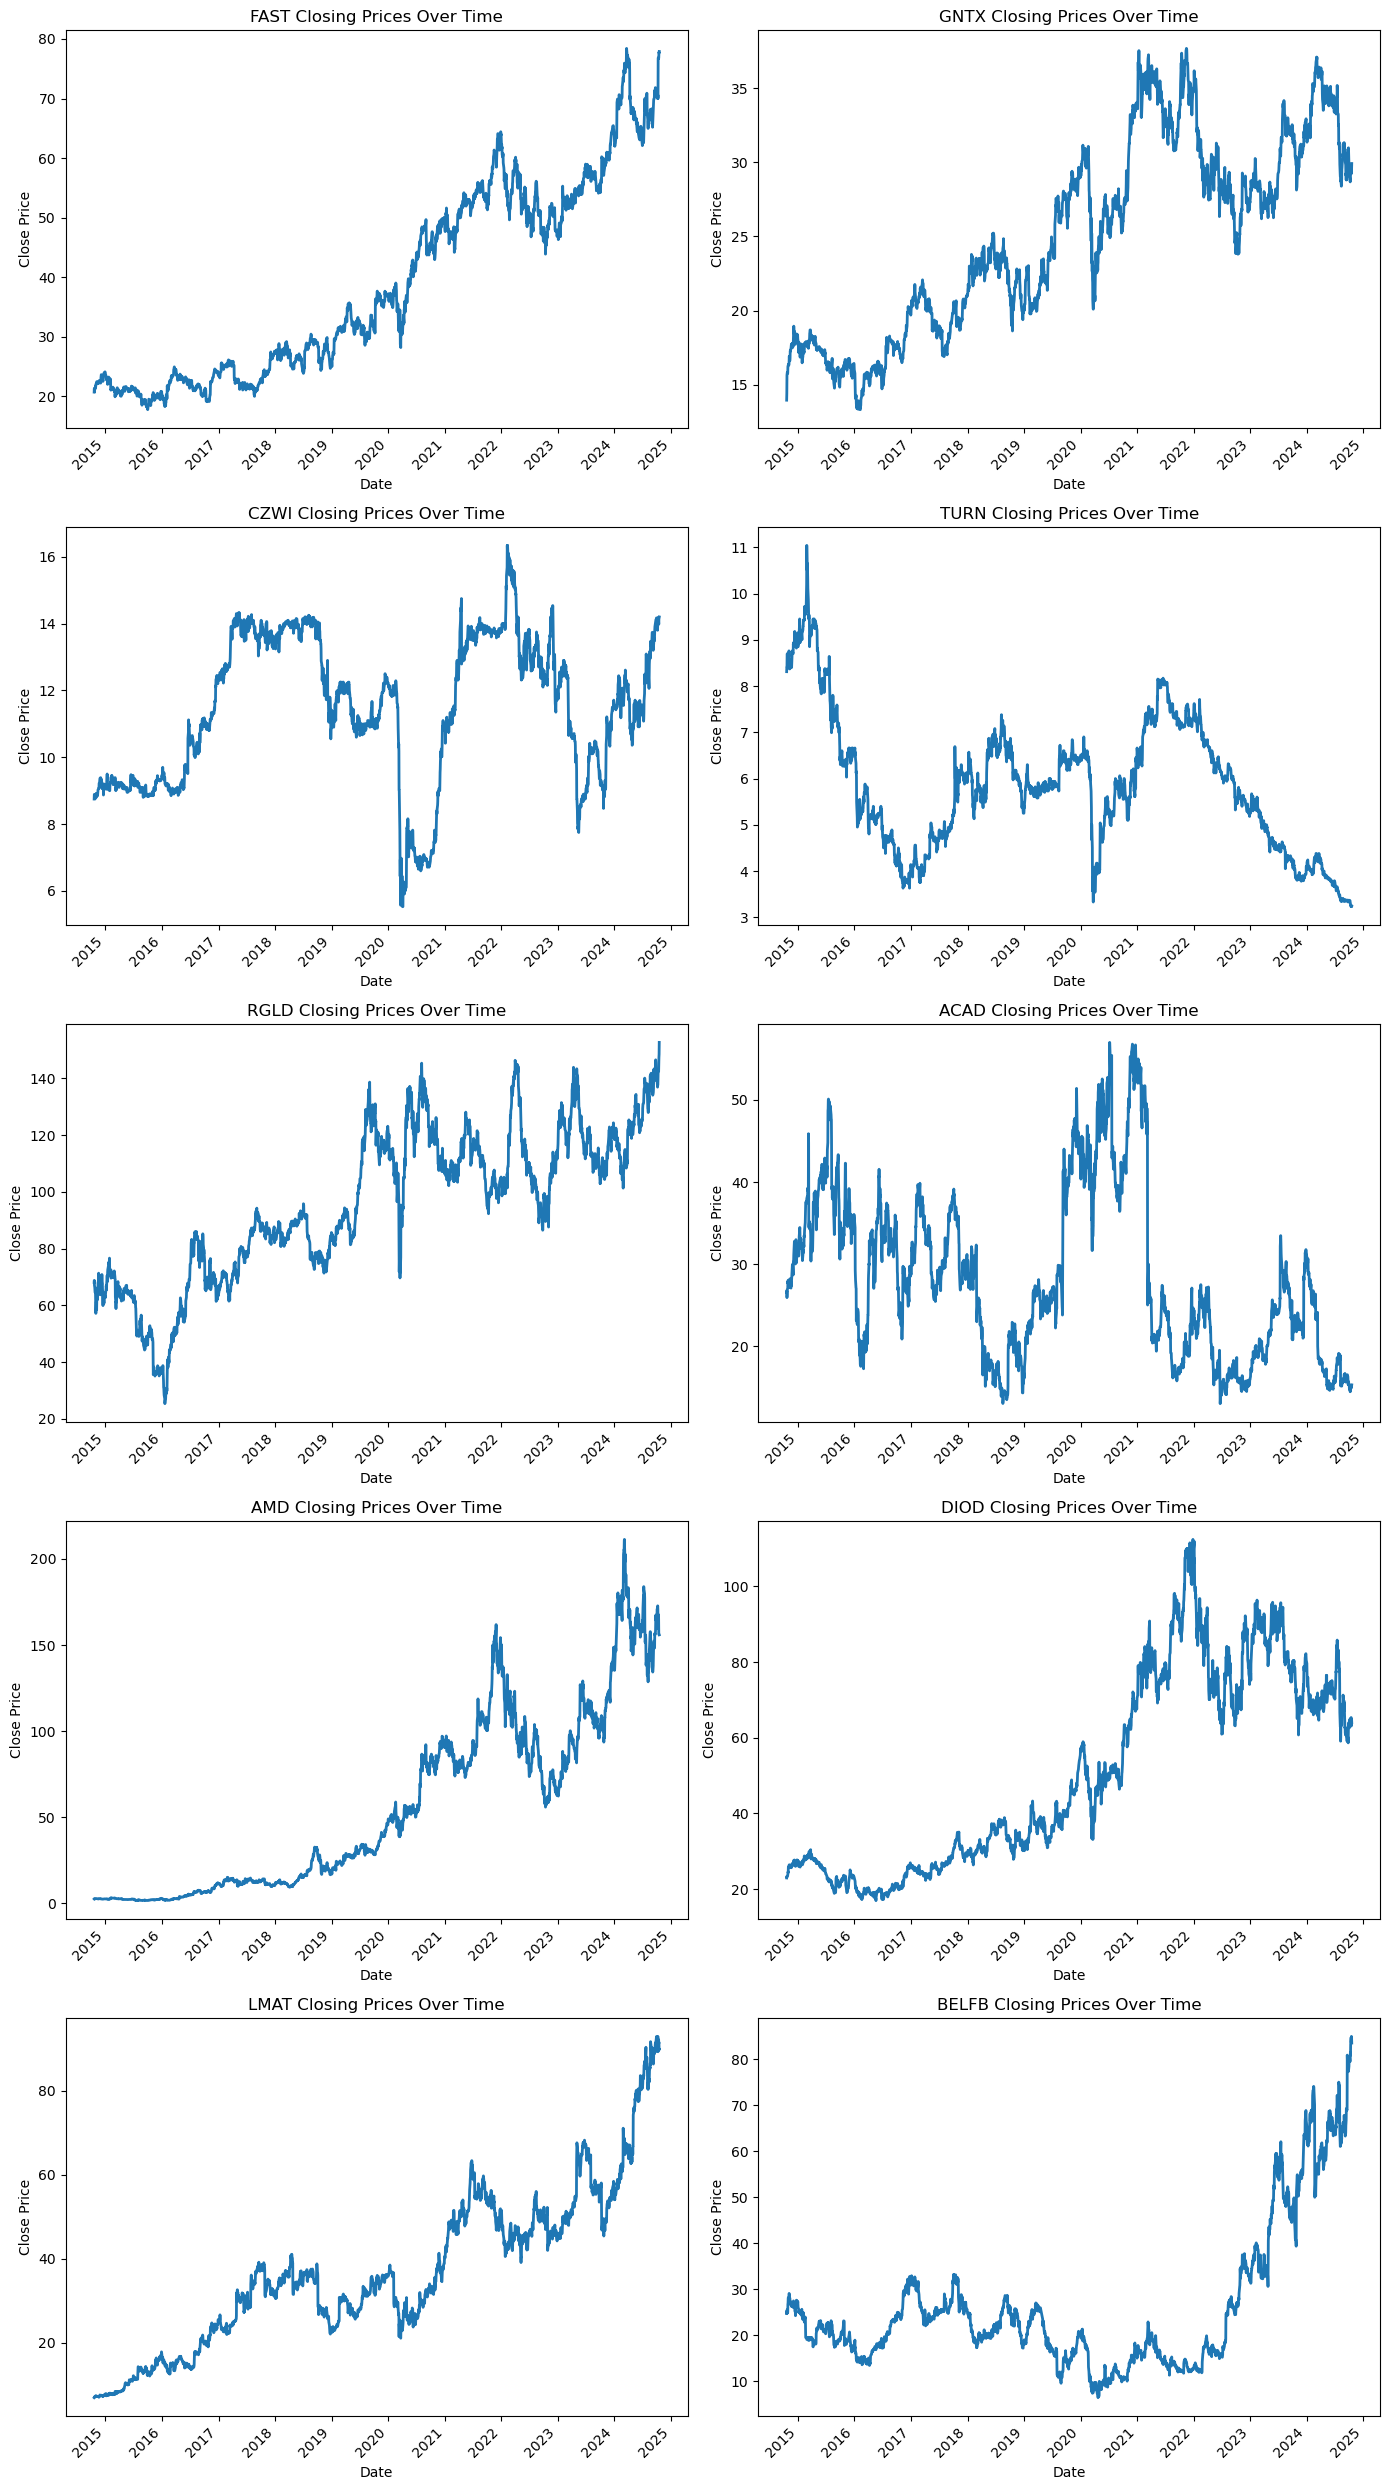

In [31]:
plt.figure(figsize=(14, 5 * n_rows))

for i, ticker in enumerate(sampled_tickers):
    plt.subplot(n_rows, n_cols, i + 1)
    df[df['Ticker'] == ticker]['Close'].plot(title=f'{ticker} Closing Prices Over Time', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()

### Plotting Yearly Returns of Sample Data

In [33]:
sampled_df.loc[:, 'Returns'] = sampled_df.groupby('Ticker')['Adj Close'].pct_change()

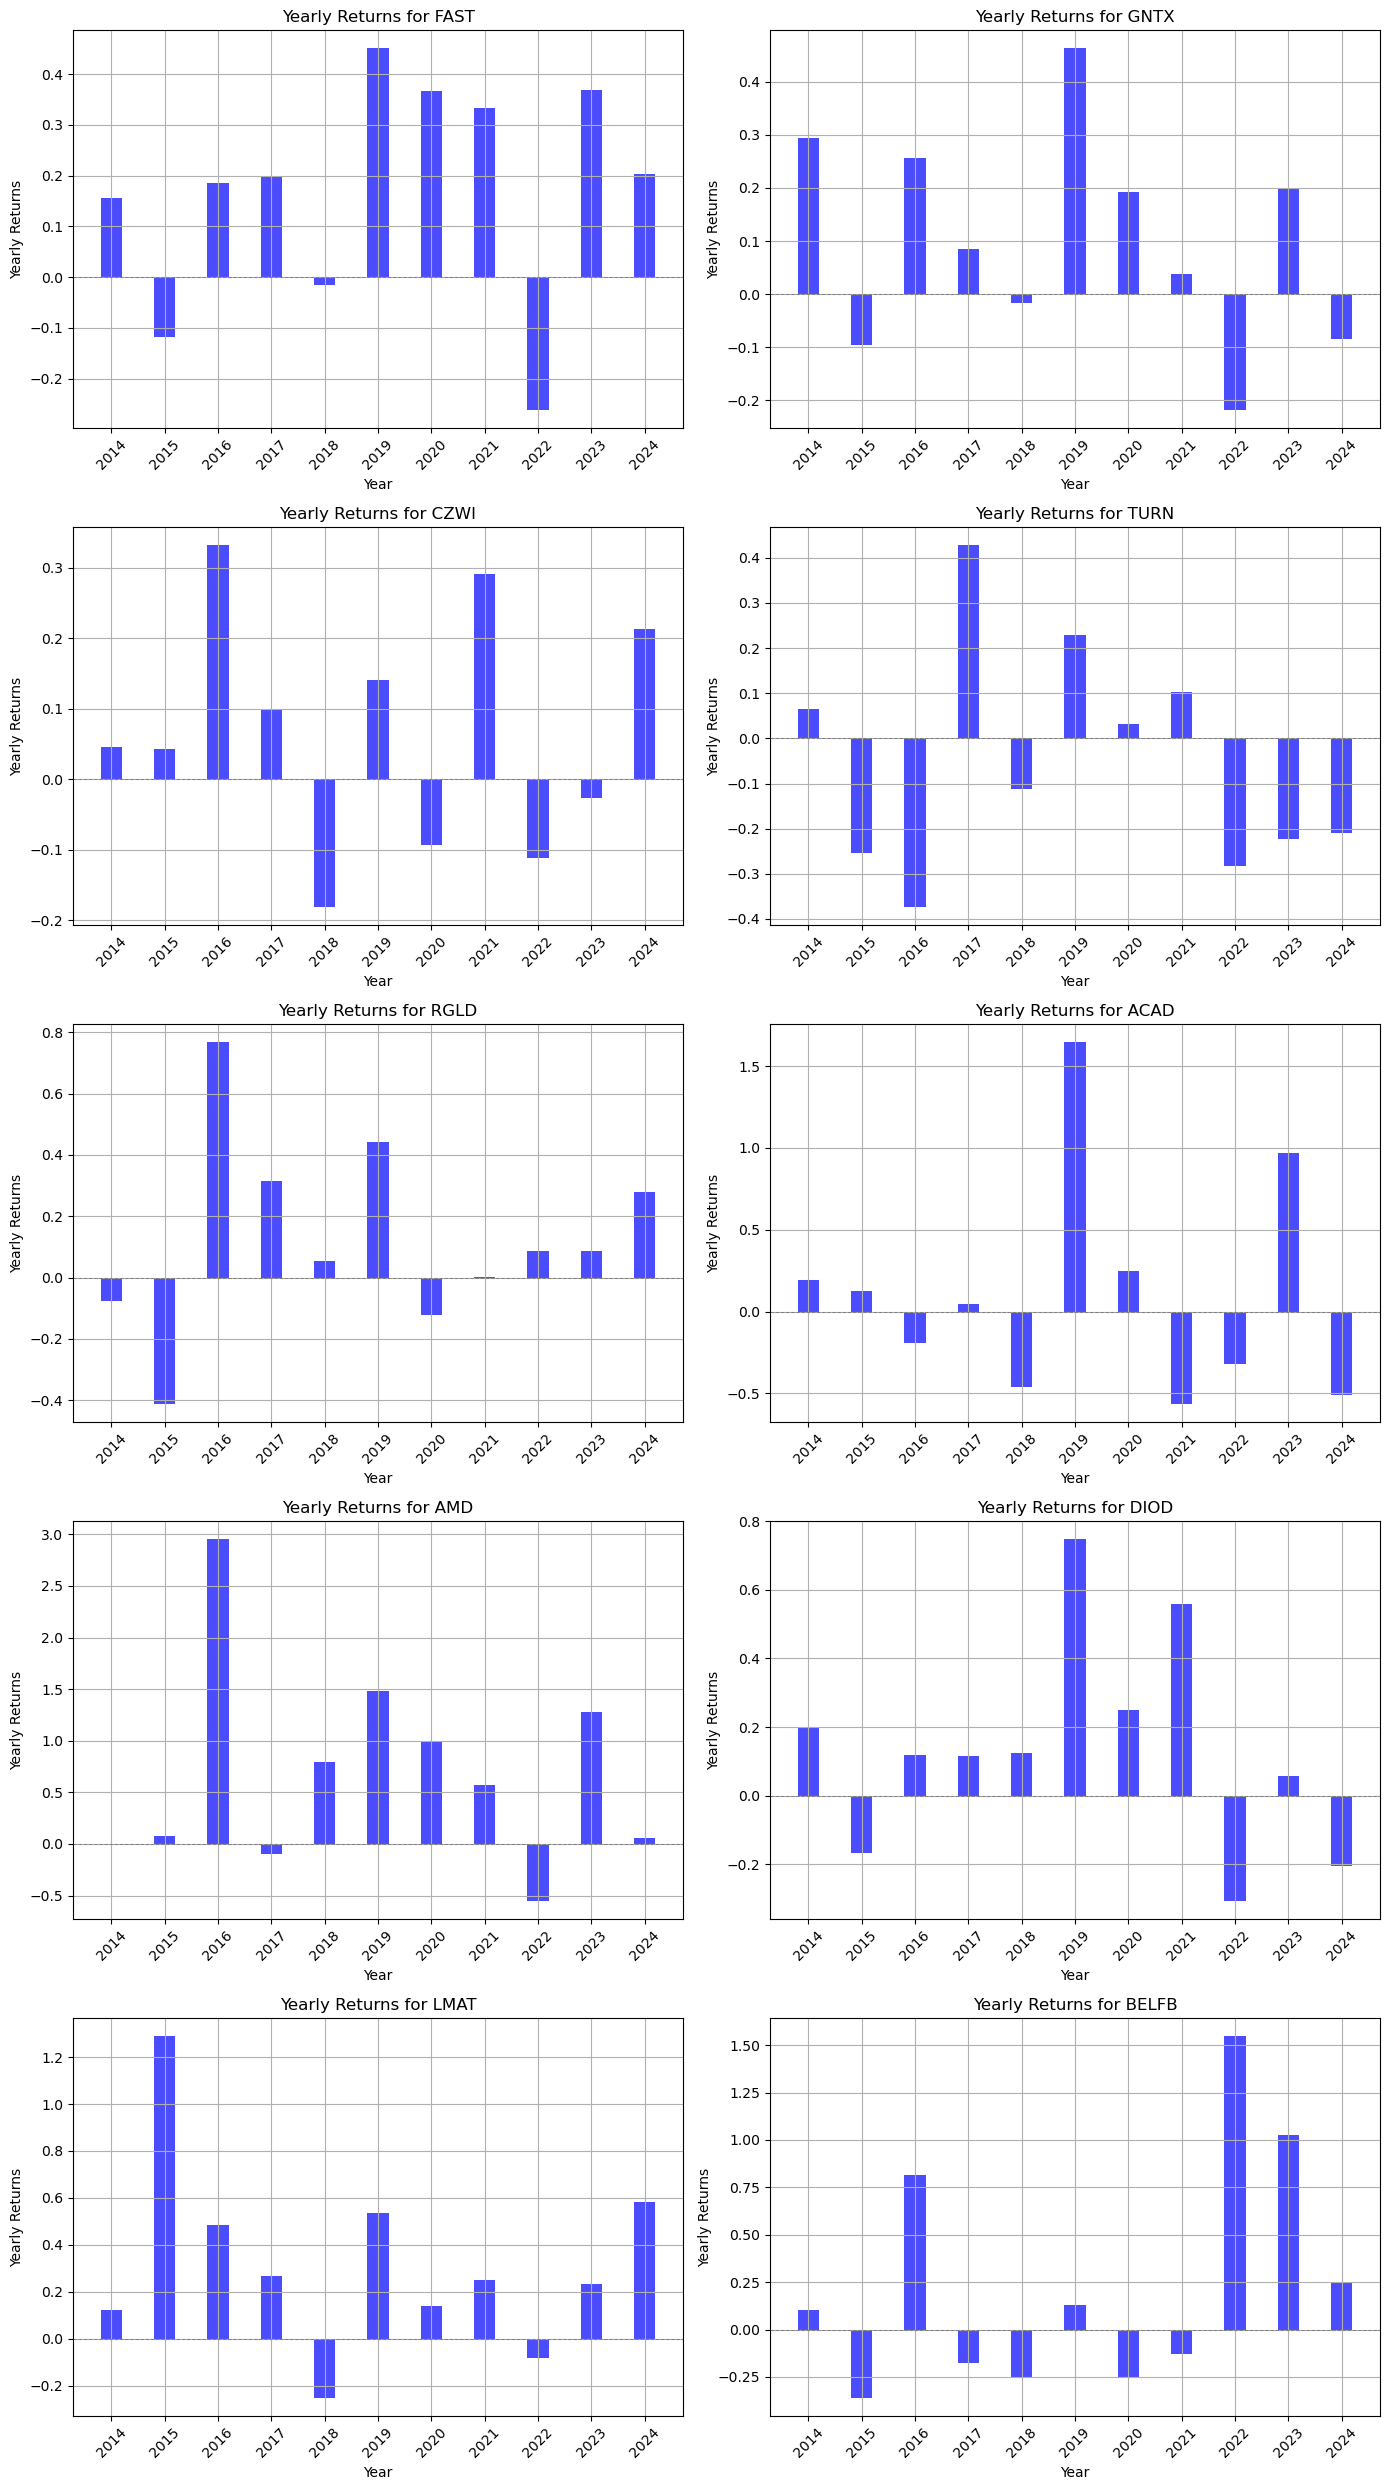

In [34]:
fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5), squeeze=False)

for idx, ticker in enumerate(sampled_tickers):
    ticker_data = sampled_df[sampled_df['Ticker'] == ticker]
    yearly_returns = ticker_data['Returns'].resample('YE').agg(lambda x: (1 + x).prod() - 1)
    ax = axs[idx // n_cols, idx % n_cols]
    ax.bar(yearly_returns.index.year, yearly_returns, color='blue', alpha=0.7, width=0.4)
    ax.set_title(f'Yearly Returns for {ticker}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Yearly Returns')
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    ax.grid()
    ax.set_xticks(yearly_returns.index.year)
    ax.set_xticklabels(yearly_returns.index.year, rotation=45)

for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()


### Volatility Analysis

In [36]:
sampled_df.loc[:, 'Yearly Volatility'] = sampled_df.groupby('Ticker')['Returns'].rolling(window=252).std().reset_index(level=0, drop=True)
sampled_df.loc[:, 'Quarterly Volatility'] = sampled_df.groupby('Ticker')['Returns'].rolling(window=60).std().reset_index(level=0, drop=True)
sampled_df.loc[:, 'Monthly Volatility'] = sampled_df.groupby('Ticker')['Returns'].rolling(window=20).std().reset_index(level=0, drop=True)

In [37]:
def smooth_series(data, window=5):
    return data.rolling(window=window).mean()

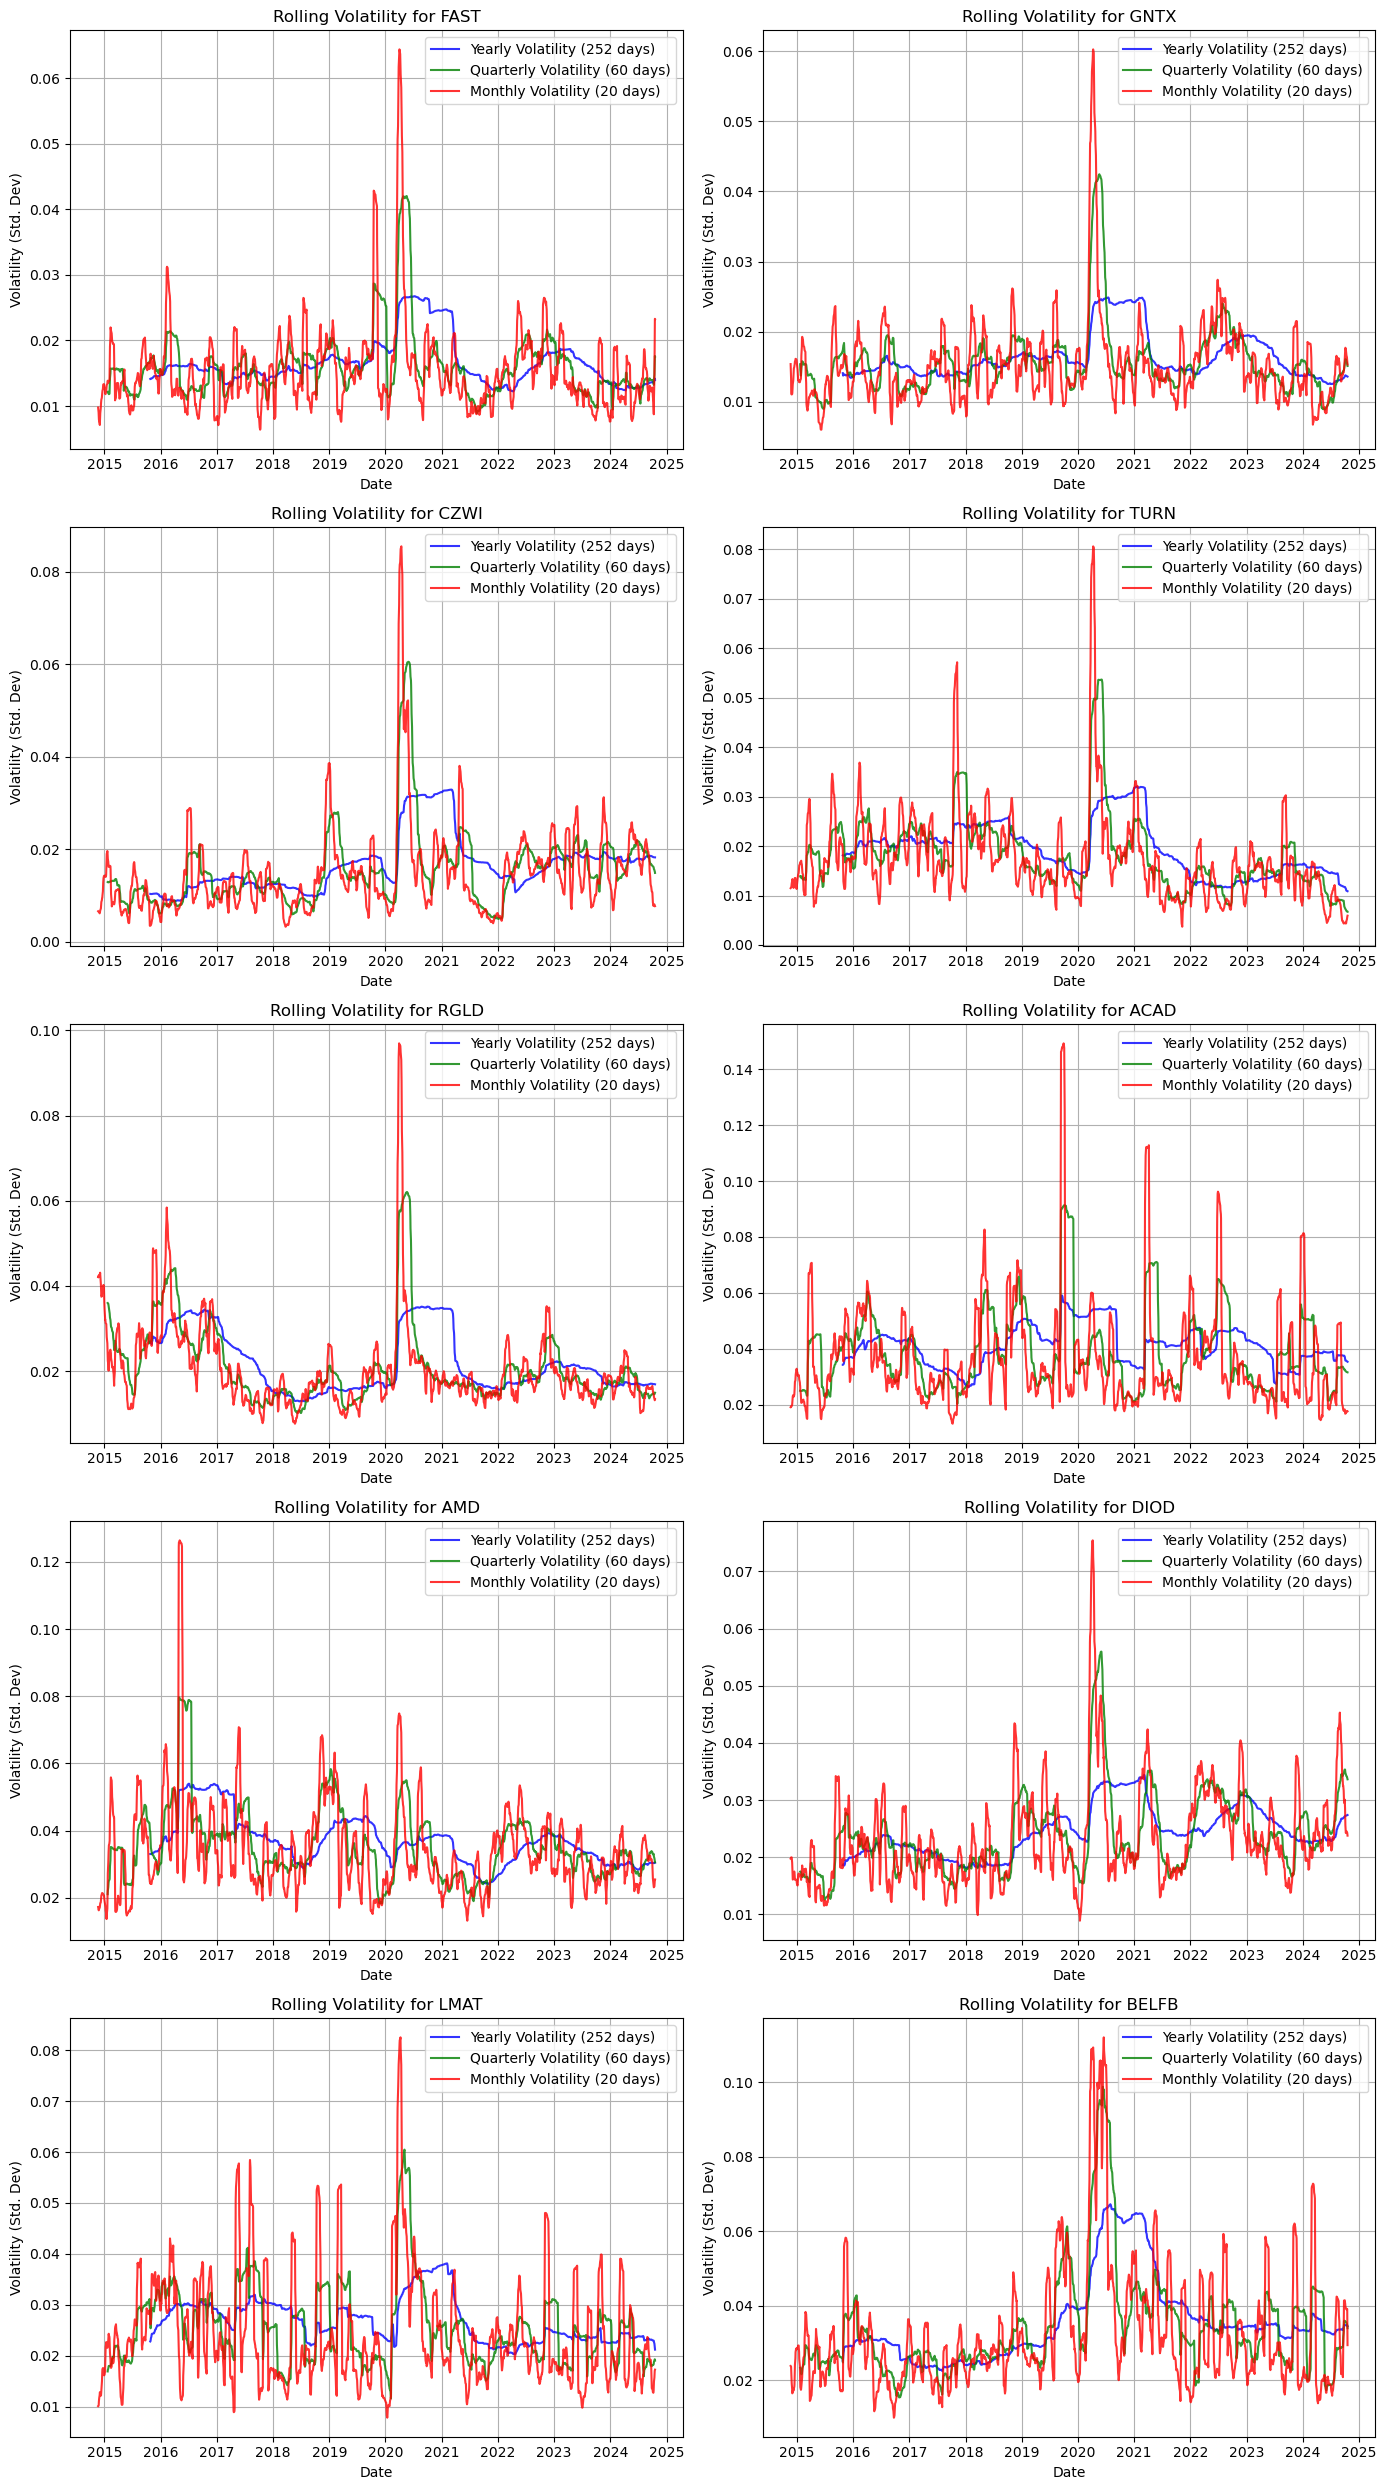

In [38]:
fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5), squeeze=False)

for idx, ticker in enumerate(sampled_tickers):
    ax = axs[idx // n_cols, idx % n_cols]
    ticker_data = sampled_df[sampled_df['Ticker'] == ticker]
    yearly_volatility_smooth = smooth_series(ticker_data['Yearly Volatility'], window=5)
    quarterly_volatility_smooth = smooth_series(ticker_data['Quarterly Volatility'], window=5)
    monthly_volatility_smooth = smooth_series(ticker_data['Monthly Volatility'], window=5)
    ax.plot(ticker_data.index, yearly_volatility_smooth, label='Yearly Volatility (252 days)', color='blue', alpha=0.8)
    ax.plot(ticker_data.index, quarterly_volatility_smooth, label='Quarterly Volatility (60 days)', color='green', alpha=0.8)
    ax.plot(ticker_data.index, monthly_volatility_smooth, label='Monthly Volatility (20 days)', color='red', alpha=0.8)
    ax.set_title(f'Rolling Volatility for {ticker}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volatility (Std. Dev)')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

### Conclusions and Observations

Most of our hypotheses about the data are confirmed by the EDA. We see the stocks vary greatly in their returns, volatility and pricings. External events such as COVID-19 pandemic has affected most of the companies, as evident by yearly returns between years 2019 and 2021. However, some sectors also experienced growth during that time, probably under some specific sector. Being able to work with different sectors is a challenging endeavour. However, we will focus on model-building now and then improve and refine as needed. A more thorough Time Series Analysis can be performed, though that will be beyond the scope of this project.

Additionally, OHLC data indeed seems to be highly correlated with each other. This is normal and makes sense.